<a href="https://colab.research.google.com/github/ucaokylong/Pytorch_self_learning/blob/main/Pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Make data from sklearn

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
#Make 1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples, noise= 0.06, random_state=42, factor = 0.85)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[: , 0],
                       "X2": X[: ,1],

                       "label": y})
circles.head(20)

,X1,X2,label
0,0.784456,0.267330,1
1,-0.772303,0.184540,1
2,-0.886698,0.252564,1
3,-0.468127,0.707145,1
4,0.447300,-0.894042,0
5,-0.495898,0.763153,1
6,-0.017872,0.856757,1
7,0.803012,0.173541,1
8,-0.188862,-0.852020,1
9,-0.105181,1.052557,0


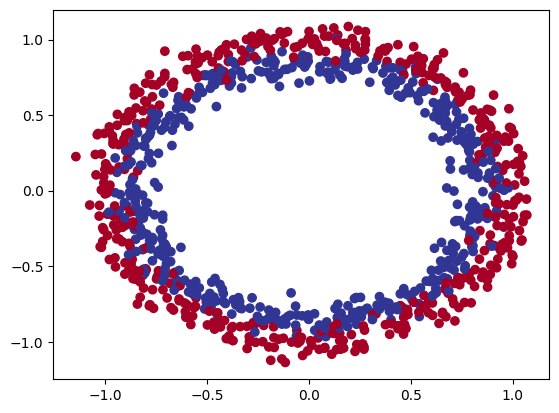

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

###1.1 Check input and output shapes

In [ ]:
X.shape, y.shape


((1000, 2), (1000,))

In [ ]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the sample for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.78445627 0.26733035] and the sample for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


###1.2 Turn data into tensors and create train and test splits  

In [ ]:
#Turn data into tensors
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
#Split data into training train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##2. Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on a accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
#import Pytorch and nn
import torch
from torch import nn
#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
#1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features= 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features= 5, out_features = 1)

    #3. Define a forward()
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

#Instantiate a instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0




CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

###2.1 setup loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
#Calculate Accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### 3.Train model

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0394],
        [-0.0164],
        [ 0.0875],
        [-0.0671],
        [ 0.3149]], device='cuda:0')

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4902],
        [0.4959],
        [0.5219],
        [0.4832],
        [0.5781]], device='cuda:0')

In [ ]:
#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze() ))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
device

'cuda'

In [ ]:
!nvidia-smi

Wed Jul 19 08:19:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |    821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 500

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 10 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 20 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 30 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 40 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 50 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 60 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 70 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 80 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 90 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 100 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epoch: 110 | Loss: 0.69815, Accuracy: 51.50% | Test loss: 0.69468, Test acc: 57.50%
Epo

In [ ]:
#4. Make predictions and evaluate the model
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download this")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download this


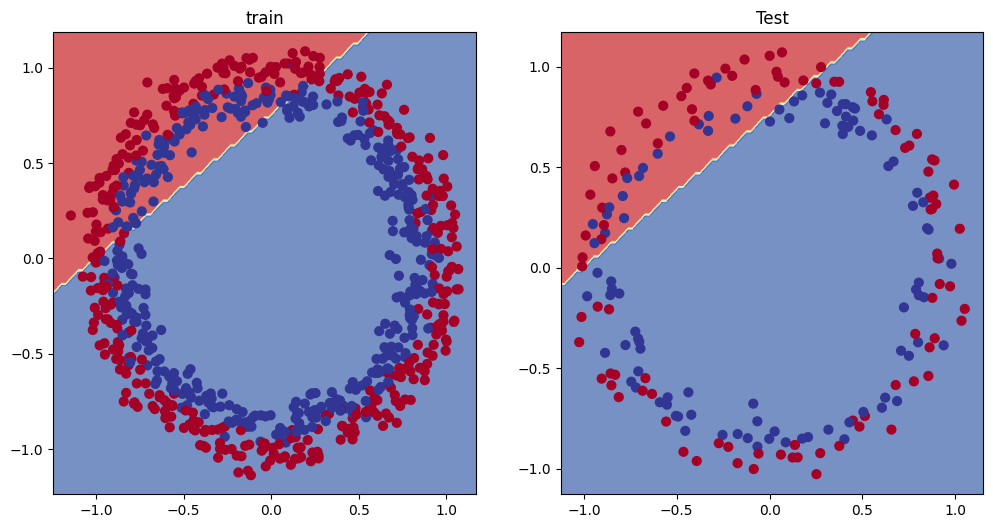

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

###4. Improving a model (from a model perspective)

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features= 2, out_features = 8)
    #self.layer_2 = torch.sigmoid(in_features = 8, out_features = 8)
    self.layer_2 = nn.Linear(in_features= 8, out_features = 8)
    #self.layer_4 = torch.sigmoid(in_features = 8, out_features = 8)
    self.layer_3 = nn.Linear(in_features= 8, out_features = 16)
    #self.layer_6 = torch.sigmoid(in_features = 16, out_features = 16)
    self.layer_4 = nn.Linear(in_features= 16, out_features = 1)

  #3. Define a forward()
  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    z = self.layer_4(z)
    return z


#Instantiate a instance of our model class and send it to the target device
model_1 = CircleModelV1().to(device)
model_1



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
)

In [ ]:
loss_fn1 = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer1 = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [ ]:
#Write a training and evaluation
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #Calculate the loss/acc
  loss = loss_fn1(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer1.zero_grad()

  #4. Loss backwards
  loss.backward()

  # 5.Optimizer step
  optimizer1.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #Calculate loss
    test_loss - loss_fn1(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70182, Accuracy: 50.00% | Test loss: 0.69468, Test acc: 50.00%
Epoch: 100 | Loss: 0.69582, Accuracy: 50.00% | Test loss: 0.69468, Test acc: 50.00%
Epoch: 200 | Loss: 0.69432, Accuracy: 53.37% | Test loss: 0.69468, Test acc: 52.50%
Epoch: 300 | Loss: 0.69391, Accuracy: 51.25% | Test loss: 0.69468, Test acc: 53.00%
Epoch: 400 | Loss: 0.69377, Accuracy: 50.00% | Test loss: 0.69468, Test acc: 54.50%
Epoch: 500 | Loss: 0.69369, Accuracy: 49.88% | Test loss: 0.69468, Test acc: 53.00%
Epoch: 600 | Loss: 0.69363, Accuracy: 49.75% | Test loss: 0.69468, Test acc: 53.50%
Epoch: 700 | Loss: 0.69358, Accuracy: 50.12% | Test loss: 0.69468, Test acc: 53.00%
Epoch: 800 | Loss: 0.69354, Accuracy: 50.00% | Test loss: 0.69468, Test acc: 54.00%
Epoch: 900 | Loss: 0.69350, Accuracy: 50.25% | Test loss: 0.69468, Test acc: 54.50%


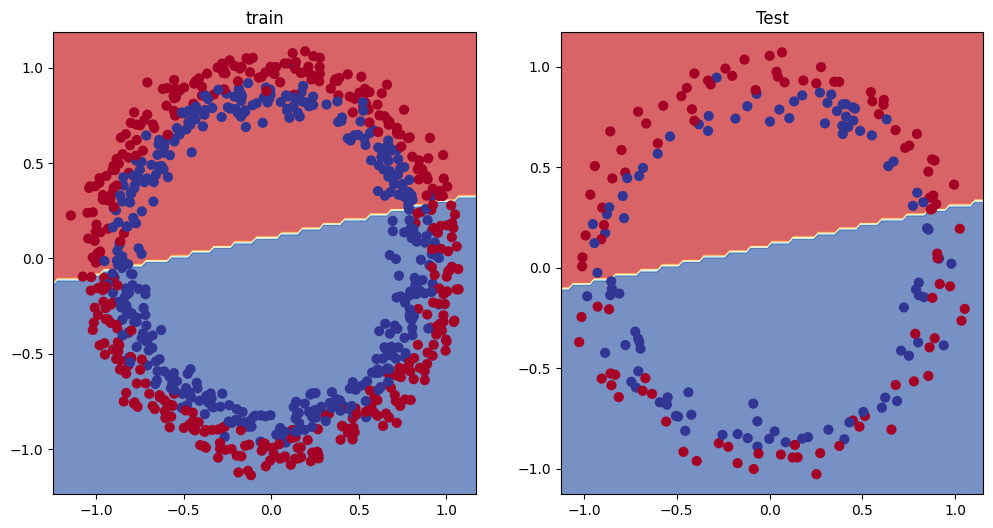

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 4.Build a non-linear model

In [ ]:
class CirclesModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features =2, out_features =8)
    self.layer_2 = nn.Linear(in_features =8, out_features =16)
    self.layer_3 = nn.Linear(in_features =16, out_features =16)
    self.layer_4 = nn.Linear(in_features =16, out_features =1)
    self.relu = nn.ReLU()

  def forward(self, x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    z = self.relu(z)
    z = self.layer_4(z)
    return z

model_2 = CirclesModelV2().to(device)
model_2


CirclesModelV2(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn2 = nn.BCEWithLogitsLoss()
optimizer2 = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
#Write a training and evaluation
torch.manual_seed(40)
torch.cuda.manual_seed(40)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
epochs = 2000

for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn2(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  optimizer2.zero_grad()

  loss.backward()

  optimizer2.step()
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn2(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 0.69753, Accuracy: 50.00% | Test loss: 0.69725, Test acc: 50.00%
Epoch: 100 | Loss: 0.69543, Accuracy: 50.00% | Test loss: 0.69520, Test acc: 50.00%
Epoch: 200 | Loss: 0.69441, Accuracy: 50.00% | Test loss: 0.69422, Test acc: 50.00%
Epoch: 300 | Loss: 0.69391, Accuracy: 50.00% | Test loss: 0.69374, Test acc: 50.00%
Epoch: 400 | Loss: 0.69365, Accuracy: 50.00% | Test loss: 0.69348, Test acc: 50.00%
Epoch: 500 | Loss: 0.69349, Accuracy: 50.00% | Test loss: 0.69334, Test acc: 50.00%
Epoch: 600 | Loss: 0.69336, Accuracy: 50.00% | Test loss: 0.69324, Test acc: 50.00%
Epoch: 700 | Loss: 0.69324, Accuracy: 50.00% | Test loss: 0.69316, Test acc: 50.00%
Epoch: 800 | Loss: 0.69317, Accuracy: 50.00% | Test loss: 0.69311, Test acc: 50.00%
Epoch: 900 | Loss: 0.69314, Accuracy: 49.38% | Test loss: 0.69308, Test acc: 50.00%
Epoch: 1000 | Loss: 0.69310, Accuracy: 46.75% | Test loss: 0.69306, Test acc: 44.00%
Epoch: 1100 | Loss: 0.69308, Accuracy: 48.88% | Test loss: 0.69303, Test acc:

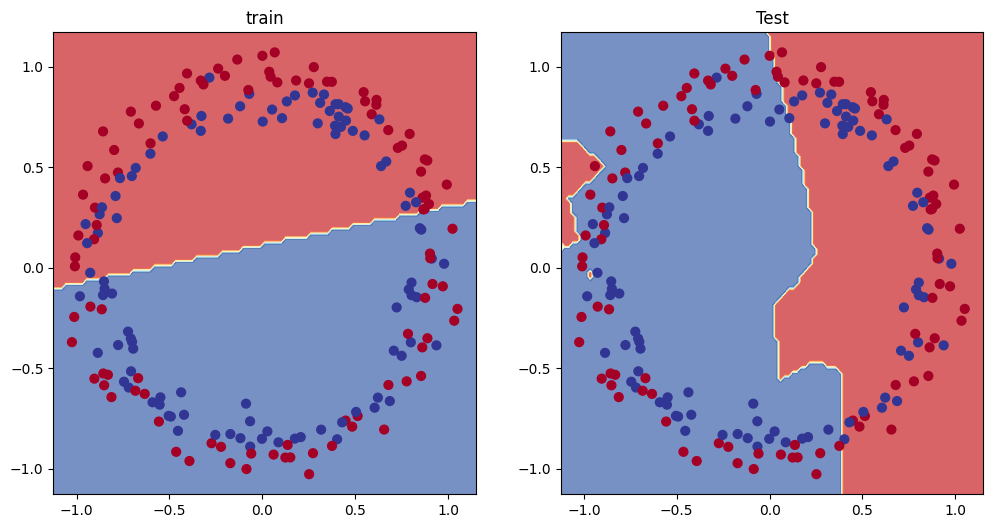

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1, X_test, y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

### 5.Build model with sigmoid function

In [ ]:
class CirclesModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features =2, out_features =8)
    self.layer_2 = nn.Linear(in_features =8, out_features =16)
    self.layer_3 = nn.Linear(in_features =16, out_features =16)
    self.layer_4 = nn.Linear(in_features =16, out_features =1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    z = self.layer_1(x)
    z = self.sigmoid(z)
    z = self.layer_2(z)
    z = self.sigmoid(z)
    z = self.layer_3(z)
    z = self.sigmoid(z)
    z = self.layer_4(z)
    return z

model_3 = CirclesModelV3().to(device)
model_3


CirclesModelV3(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
loss_fn3 = nn.BCEWithLogitsLoss()
optimizer3 = torch.optim.AdamW(model_3.parameters(), lr=0.2)

In [ ]:
#Write a training and evaluation
torch.manual_seed(40)
torch.cuda.manual_seed(40)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn3(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  optimizer3.zero_grad()

  loss.backward()

  optimizer3.step()
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn3(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if (epoch % 100 == 0) or (epoch == epochs-1):
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69520, Accuracy: 50.00% | Test loss: 1.26705, Test acc: 50.00%
Epoch: 100 | Loss: 0.69315, Accuracy: 50.00% | Test loss: 0.69315, Test acc: 50.00%
Epoch: 200 | Loss: 0.69315, Accuracy: 48.75% | Test loss: 0.69315, Test acc: 53.00%
Epoch: 300 | Loss: 0.69315, Accuracy: 49.12% | Test loss: 0.69315, Test acc: 54.00%
Epoch: 400 | Loss: 0.69314, Accuracy: 52.62% | Test loss: 0.69315, Test acc: 47.50%
Epoch: 500 | Loss: 0.74038, Accuracy: 50.00% | Test loss: 0.68013, Test acc: 55.00%
Epoch: 600 | Loss: 0.22046, Accuracy: 91.00% | Test loss: 0.45351, Test acc: 79.50%
Epoch: 700 | Loss: 0.20905, Accuracy: 91.00% | Test loss: 0.46545, Test acc: 78.50%
Epoch: 800 | Loss: 0.31713, Accuracy: 85.62% | Test loss: 0.48873, Test acc: 78.00%
Epoch: 900 | Loss: 0.20895, Accuracy: 90.62% | Test loss: 0.49421, Test acc: 78.50%
Epoch: 999 | Loss: 0.20521, Accuracy: 90.50% | Test loss: 0.48272, Test acc: 77.50%


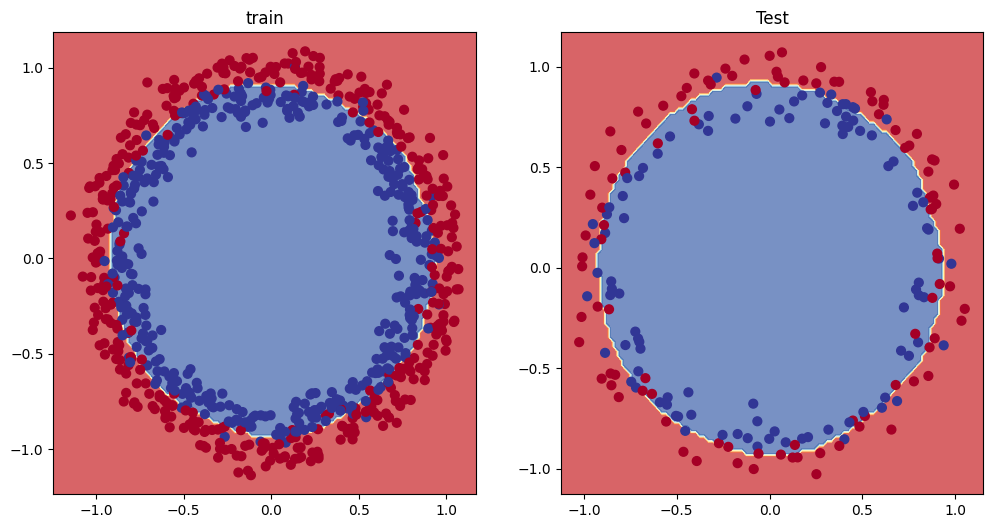

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# **Multi-class Classification**

###Creating mutli-class classification data###
To begin a multi-class classification problem, let's create some multi-class data.

To do so, we can leverage Scikit-Learn's make_blobs() method.

This method will create however many classes (using the centers parameter) we want.

Specifically, let's do the following:


*   Create some multi-class data with make_blobs().

*   Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).

*   Split the data into training and test sets using train_test_split().
Visualize the data.






tensor([[-0.7422, -0.9408],
        [ 2.2959,  3.0183],
        [-0.7032, -9.6472],
        [ 7.1981, -3.5480],
        [ 6.5983, -4.8136],
        [ 9.0737, -4.1605]]) tensor([3, 3, 0, 1, 1, 1])


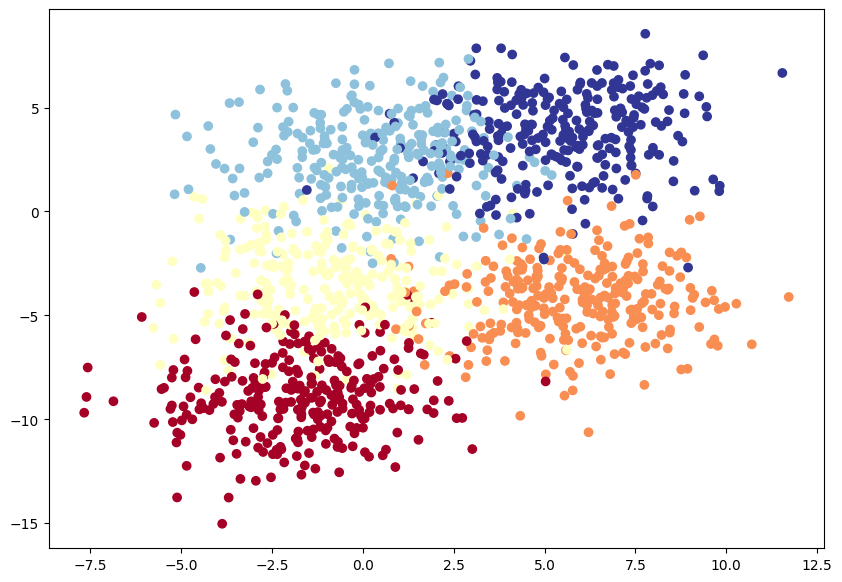

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 40

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1400,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=2, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:6], y_blob[:6])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### Building a multi-class classification model in PyTorch ###


In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [ ]:
# Create loss and optimizer
loss_fn_multi_class = nn.CrossEntropyLoss()
optimizer_multi_class = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [ ]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.5610,  0.0718, -0.8678, -0.1374,  0.1840],
        [ 0.4909, -0.6257, -0.5133, -0.5193, -0.1405],
        [ 0.5877,  0.8875, -1.0639,  0.4201,  0.6132],
        [ 0.4290, -0.9756, -0.2302, -0.6575, -0.2793],
        [ 0.3135, -1.8204,  0.3194, -1.0592, -0.6449]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([5]), 5)

In [ ]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.4818, -0.4598, -0.4960, -0.3769, -0.0402],
        [ 0.6186,  1.2150, -1.2222,  0.6035,  0.7674],
        [ 0.2847, -0.8881,  0.3292, -0.3035, -0.1012],
        [ 0.3862, -0.2741, -0.1395, -0.0467,  0.1488],
        [ 0.3657, -1.2706,  0.0525, -0.7518, -0.3863]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.3593, 0.1401, 0.1352, 0.1522, 0.2132],
        [0.1953, 0.3546, 0.0310, 0.1924, 0.2267],
        [0.2785, 0.0862, 0.2912, 0.1547, 0.1894],
        [0.2821, 0.1457, 0.1667, 0.1830, 0.2225],
        [0.3671, 0.0715, 0.2684, 0.1201, 0.1730]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.3593, 0.1401, 0.1352, 0.1522, 0.2132], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')


In [ ]:
# Fit the model
torch.manual_seed(45)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    #print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn_multi_class(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer_multi_class.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer_multi_class.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.32315, Acc: 88.30% | Test Loss: 0.32228, Test Acc: 87.86%
Epoch: 10 | Loss: 0.32287, Acc: 88.30% | Test Loss: 0.32235, Test Acc: 87.86%
Epoch: 20 | Loss: 0.32261, Acc: 88.30% | Test Loss: 0.32242, Test Acc: 87.86%
Epoch: 30 | Loss: 0.32238, Acc: 88.39% | Test Loss: 0.32249, Test Acc: 87.86%
Epoch: 40 | Loss: 0.32217, Acc: 88.39% | Test Loss: 0.32257, Test Acc: 87.86%
Epoch: 50 | Loss: 0.32197, Acc: 88.39% | Test Loss: 0.32264, Test Acc: 88.21%
Epoch: 60 | Loss: 0.32179, Acc: 88.39% | Test Loss: 0.32272, Test Acc: 88.21%
Epoch: 70 | Loss: 0.32163, Acc: 88.39% | Test Loss: 0.32280, Test Acc: 88.21%
Epoch: 80 | Loss: 0.32148, Acc: 88.39% | Test Loss: 0.32288, Test Acc: 88.21%
Epoch: 90 | Loss: 0.32134, Acc: 88.30% | Test Loss: 0.32295, Test Acc: 88.21%


In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  3.6514,   2.7543,   3.6436,  -3.1089,  -7.2352],
        [-10.5470,   1.9988,  -0.0976,   3.5336,   5.1418],
        [  3.8840,  -2.4316,   6.4781,   1.0416,  -7.8343],
        [ -0.2454,  -1.0054,   4.5119,   1.6248,  -4.1091],
        [  9.4783,   1.4640,   6.0327,  -4.5236, -12.4366],
        [-20.5782,   1.5312,  -2.7760,   8.1723,  13.8911],
        [-17.2446,  -0.9059,  -0.5029,   8.7550,  10.7859],
        [ 15.5479,   1.9640,   7.5376,  -7.5082, -17.7140],
        [ -5.6578,   6.1297,  -0.8742,  -1.9254,   1.1748],
        [-13.3664,  -5.0174,   2.8225,  10.4786,   7.0761]], device='cuda:0')

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:20]}\nLabels: {y_blob_test[:20]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([0, 4, 2, 2, 0, 4, 4, 0, 1, 3, 4, 2, 1, 2, 3, 2, 2, 0, 0, 2],
       device='cuda:0')
Labels: tensor([1, 4, 2, 2, 0, 4, 4, 0, 1, 3, 4, 2, 1, 2, 3, 2, 2, 0, 0, 2],
       device='cuda:0')
Test accuracy: 87.85714285714286%


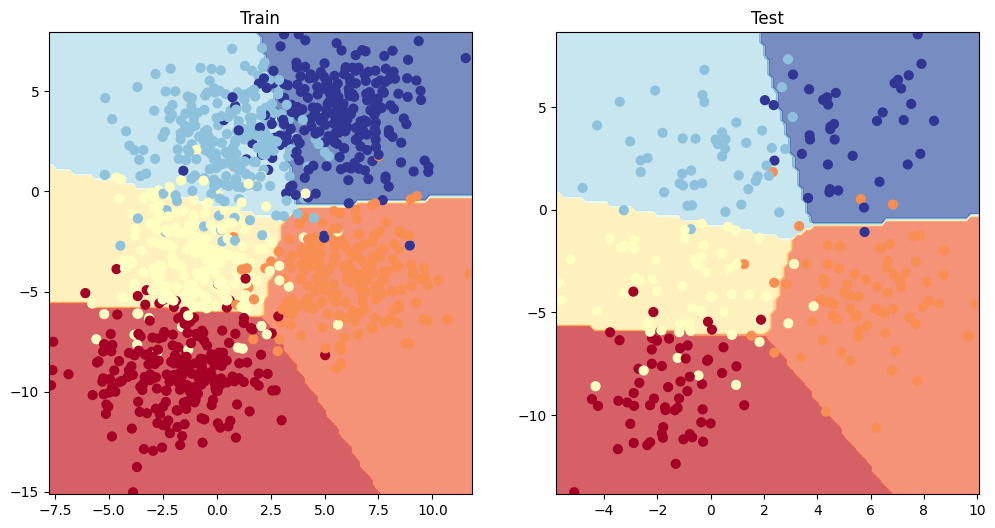

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=5).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.8786, device='cuda:0')

In [ ]:
import numpy as np

In [ ]:
theta = np.random.uniform(-np.pi, np.pi, 1000)
# r = np.random.normal(loc=1, scale=0.1, size=1000)
m = np.cos(theta) + np.random.normal(0, 0.1, size=1000)
n = np.sin(theta) + np.random.normal(0, 0.1, size=1000)

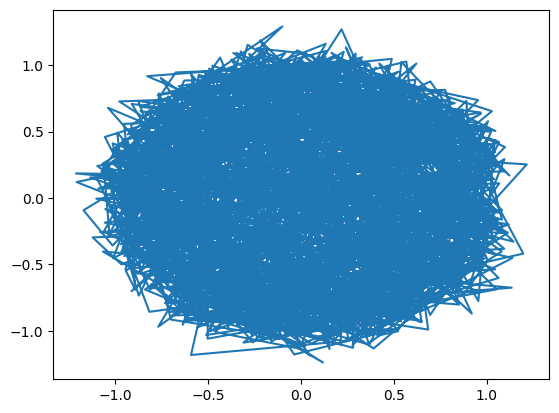

In [ ]:
import matplotlib.pyplot as plt
plt.plot(m,n)